In [1]:
import logging
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolate(x, pivots):
    pivots.sort()

    logging.info("Lagrange interpolation")
    logging.info(f"Pivot points: {pivots}")

    for xn, xp in zip(pivots[1:], pivots[:-1]):
        if xn == xp:
            logging.warning("Found two matching points on x-axis, cannot continue")
            return None

    y = 0
    for i in range(len(pivots)):
        xi, poly = pivots[i]

        for j in range(len(pivots)):
            if i == j:
                continue
            xj, _ = pivots[j]
            poly *= (x - xj) / (xi - xj)

        logging.debug(f"Weight of point {i}: {poly}")
        
        y += poly
        logging.info(f"y value after point {i}: {y}")

    return y

def newton_interpolate(x, pivots):
    def build_diffs(xs, diffs, i, j):
        if i == j:
            return diffs[i][j]

        if diffs[i][j - 1] is None:
            build_diffs(xs, diffs, i, j - 1)
        if diffs[i + 1][j] is None:
            build_diffs(xs, diffs, i + 1, j)

        diffs[i][j] = (diffs[i + 1][j] - diffs[i][j - 1]) / (xs[j] - xs[i])

    pivots.sort()

    logging.info("Newton interpolation")
    logging.info(f"Pivot points: {pivots}")

    xs, ys = [list(t) for t in zip(*pivots)]

    div_diffs = [[None for _ in pivots] for _ in pivots]
    for i in range(len(pivots)):
        div_diffs[i][i] = ys[i]
    build_diffs(xs, div_diffs, 0, len(pivots) - 1)

    logging.debug(f"Divided differences intervals:")
    for i in range(len(pivots)):
        for j in range(i, len(pivots)):
            logging.debug(f"{i}, {j}: {div_diffs[i][j]}")

    y = 0
    for i in range(len(pivots)):
        coef = 1
        for j in range(i):
            coef *= x - xs[j]
        y += div_diffs[0][i] * coef
        logging.info(f"y value after point {i}: {y}")

    return y


In [2]:
f = lambda x : np.sqrt(x)

xs_a = [0, 1.7, 3.4, 5.1]
xs_b = [0, 1.7, 4.0, 5.1]

points_a = list(map(lambda x : (x, f(x)), xs_a))
points_b = list(map(lambda x : (x, f(x)), xs_b))

x = 3
real_y = f(x)
lagrange_y = lagrange_interpolate(x, points_a)
newton_y = newton_interpolate(x, points_b)

print("Real y value:         ", real_y)
print("y value from Lagrange:", lagrange_y)
print("y value from Newton:  ", newton_y)

Real y value:          1.7320508075688772
y value from Lagrange: 1.7517775793854795
y value from Newton:   1.774713393520687


### Интерполяционный многочлен Лагранжа

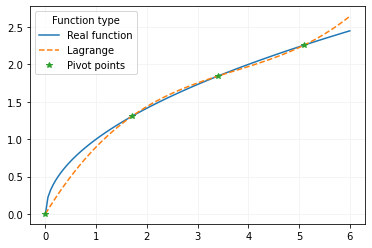

In [3]:
x = np.linspace(0, 6, 120)
plt.plot(x, f(x), label="Real function")
plt.plot(x, lagrange_interpolate(x, points_a), '--', label="Lagrange")
plt.plot(xs_a, f(xs_a), '*', label="Pivot points")

plt.legend(title="Function type")
plt.grid(color="0.95")
plt.show()

### Интерполяционный многочлен Ньютона

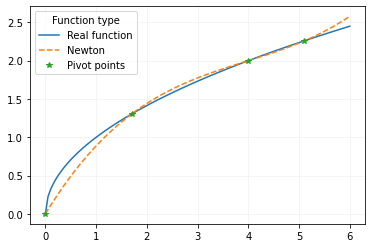

In [4]:
plt.plot(x, f(x), label="Real function")
plt.plot(x, newton_interpolate(x, points_b), '--', label="Newton")
plt.plot(xs_b, f(xs_b), '*', label="Pivot points")

plt.legend(title="Function type")
plt.grid(color="0.95")
plt.show()